# Execute the code below
You will get a passenger list of the titanic.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(
    lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns?

In [18]:
# What are the "type" of each column?
df = df_titanic.copy()
df.info()

colonnes_non_numeric = df.select_dtypes(
    exclude=['float64', 'int64']).columns.tolist()
print(colonnes_non_numeric)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB
['Survived', 'Name', 'Sex']


Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

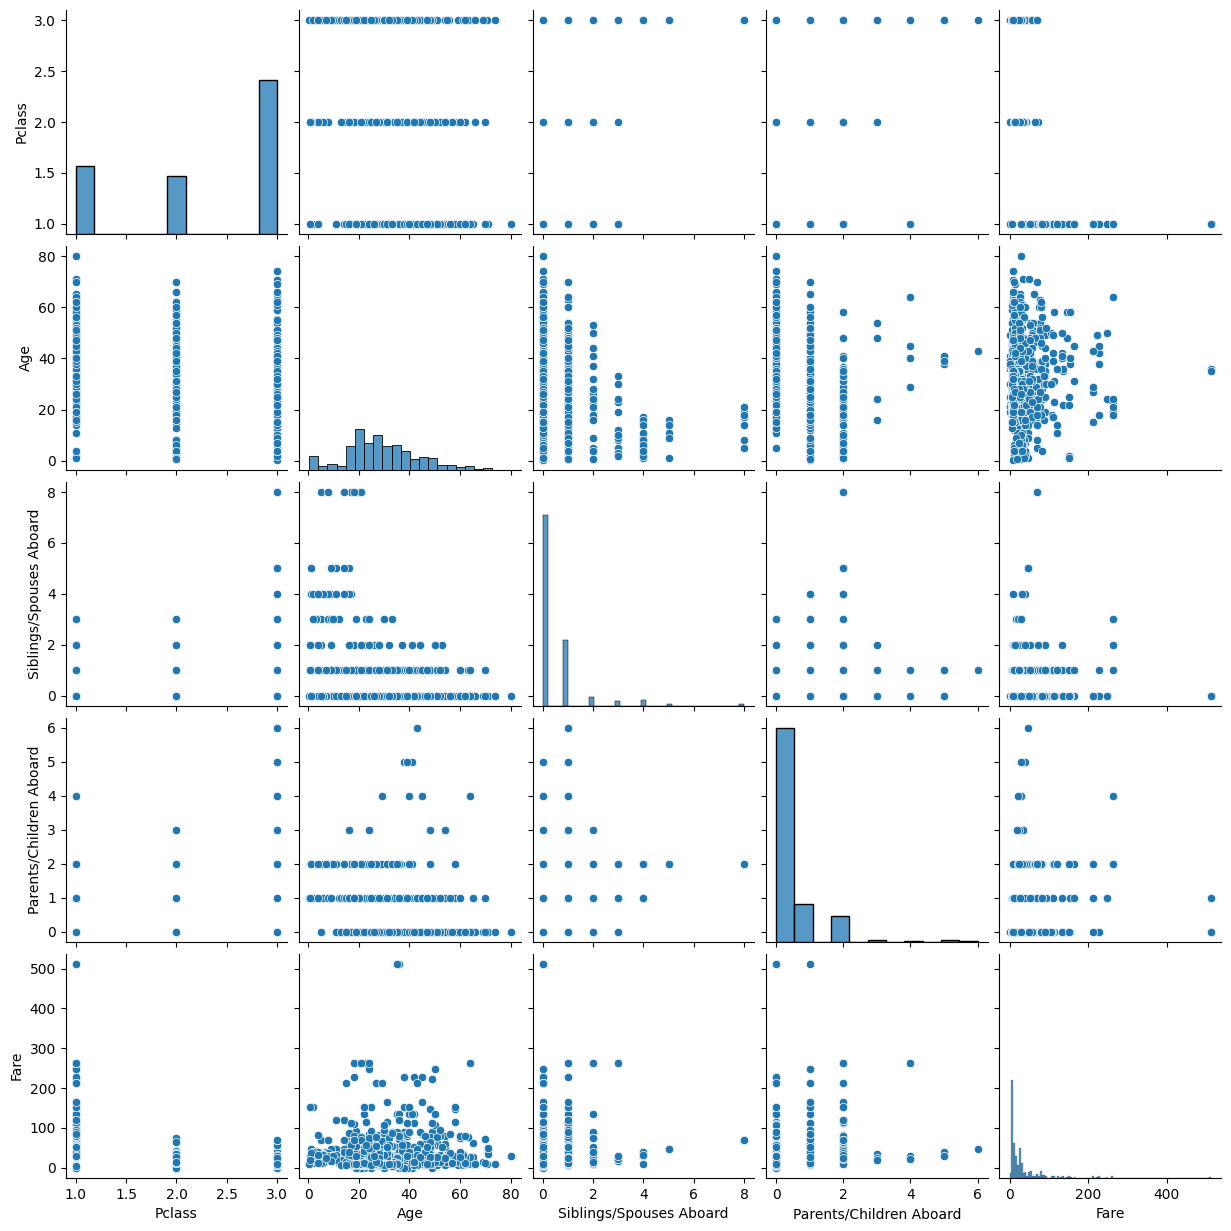

In [5]:
# First exploration:
sns.pairplot(df)
plt.show()

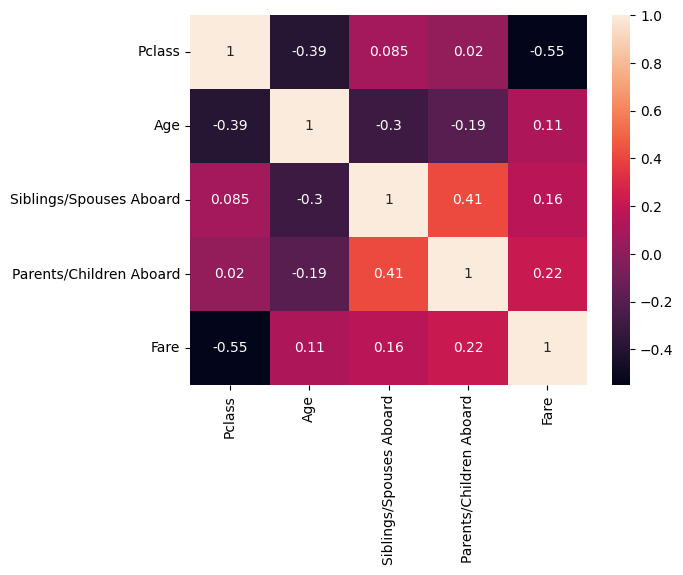

In [6]:
# Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number])
# Calcul de la matrice de corrélation
corr_matrix = numeric_cols.corr()


sns.heatmap(corr_matrix, annot=True)


plt.show()

You are looking for Jack. How many people named Jack on board?

In [19]:
# How many people named Jack on board?
number_of_jack = df[df["Name"].str.contains("Jack")]
print("personne ne s'appelle Jack à bord, le nom le plus proche est :\n")
print(number_of_jack["Name"].tolist())
# print(len(number_of_jack))

personne ne s'appelle Jack à bord, le nom le plus proche est :

['Dr. Arthur Jackson Brewe']


In [8]:
# df["Name"].tolist()

# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers.
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die.

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [34]:
# It's up to you:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X = df.select_dtypes(include=[np.number])
# X=X.drop("survived", axis=1)
y = df["Survived"]
print(X.head(2))


# We predict on the 5 first rows
X_train, X_test, y_train, y_test = ttsplit(X, y,
                                           test_size=0.2,
                                           random_state=36)
model = LogisticRegression()
model.fit(X_train, y_train)
# model.predict(X_test.iloc[:5,:])
# Print the accuracy score on the train set and on the test set. Is there overfitting?
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)
score_train_set = accuracy_score(y_train, prediction_train)
score_test_set = accuracy_score(y_test, prediction_test)
print(f"\nscore_train_set :{score_train_set:.3f}  \nscore_test_set:  {
      score_test_set:.3f} \n")
# Vérification de l'overfitting
if score_train_set > score_test_set:
    print("\nIl y a un overfitting.")
else:
    print("\nIl n'y a pas d'overfitting.")
# Print the Confusion Matrix on the test set
y_predicted = model.predict(X_test)
matrice_confusion = confusion_matrix(
    y_test, y_predicted, labels=['Dead', 'Survived'])
print(f"\nla matrice de confusion nous indique que: \n -les vrais positifs sont {matrice_confusion[0, 0]} les faux positifs sont: {
      matrice_confusion[0, 1]} \n -les vrais négatifs {matrice_confusion[1, 0]} et les faux négatifs sont  {matrice_confusion[1, 1]}\n")
# [[vrais 'Dead' faux 'Survived']
#  [faux 'Dead' vrais 'Survived']]
# How many iterations were needed to train this model?
print(f"Nombre d'itérations : {model.n_iter_[0]}")

   Pclass   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare
0       3  22.0                        1                        0   7.2500
1       1  38.0                        1                        0  71.2833

score_train_set :0.715  
score_test_set:  0.640 


Il y a un overfitting.

la matrice de confusion nous indique que: 
 -les vrais positifs sont 85 les faux positifs sont: 17 
 -les vrais négatifs 47 et les faux négatifs sont  29

Nombre d'itérations : 62


# Model improvement

With your fancy time machine, you can, and you will save all the people that the model will predict as dead. But you won't save people predicted as "survived" (because it's not necessary). So change the weights of the classes to be very careful: your goal is to save all the people at risk. So, in this case, it's better to have "actual survived" peopple predicted as death, because you'll save them anyway. Otherwise, "actual death" predicted as survived won't be saved by your time machine.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

Avec votre machine à voyager dans le temps, vous pouvez et vous allez sauver toutes les personnes que le modèle prédira comme mortes. Mais vous ne sauverez pas les personnes prédites comme “survivantes” (car ce n’est pas nécessaire). Vous devez donc changer les poids des classes pour être très prudent : votre objectif est de sauver toutes les personnes à risque. Donc, dans ce cas, il est préférable d’avoir des personnes “réellement survivantes” prédites comme mortes, car vous les sauverez de toute façon. Sinon, les “morts réels” prédits comme survivants ne seront pas sauvés par votre machine à voyager dans le temps.

Changez le poids des classes

Entraînez le modèle sur l’ensemble d’entraînement

Imprimez le score de précision sur l’ensemble d’entraînement et sur l’ensemble de test

Imprimez la matrice de confusion sur l’ensemble de test, vous ne devez avoir aucun décès qui a été prédit comme “Survécu”. 🚀

In [64]:
# It's up to you to save everybody:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Changez le poids des classes
weights = {'Dead': 0.9, 'Survived': 0.1}

# Entraînez le modèle sur l’ensemble d’entraînement
#  -Choix du modele
model = LogisticRegression(class_weight=weights)
# model = DecisionTreeClassifier(class_weight=weights)
# model = RandomForestClassifier(class_weight=weights)

#  -Entraînement du modèle
model.fit(X_train, y_train)

# Imprimez le score de précision sur l’ensemble d’entraînement et sur l’ensemble de test
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train score: {train_score:.3f}")
print(f"Test score: {test_score:.3f}")

# Imprimez la matrice de confusion sur l’ensemble de test, vous ne devez avoir aucun décès qui a été prédit comme “Survécu”.
#  probabilite
y_pred_proba = model.predict_proba(X_test)
# print(f"\ny_pred_proba :\n{y_pred_proba} \n")
y_pred = model.predict(X_test)
# Prevision en changeant le Seuil de decision à 0.3 au lieu de 0.5 par défaut
# y_pred = (y_pred_proba[:, 1] > 0.3).astype(int)

matrice_confusion = confusion_matrix(
    y_test, y_pred, labels=['Dead', 'Survived'])
print(f"\nmatrice_confusion :\n{matrice_confusion} \n")
print(f"\nla matrice de confusion nous indique que: \n -les Dead correctements predits sont: {matrice_confusion[0, 0]}, les survivants incorrectements predits sont: {
      matrice_confusion[0, 1]} \n -les Dead incorrectements predits sont: {matrice_confusion[1, 0]}, les survivants correctements predits sont:  {matrice_confusion[1, 1]}\n")

Train score: 0.626
Test score: 0.579

matrice_confusion :
[[102   0]
 [ 75   1]] 


la matrice de confusion nous indique que: 
 -les Dead correctements predits sont: 102, les survivants incorrectements predits sont: 0 
 -les Dead incorrectements predits sont: 75, les survivants correctements predits sont:  1



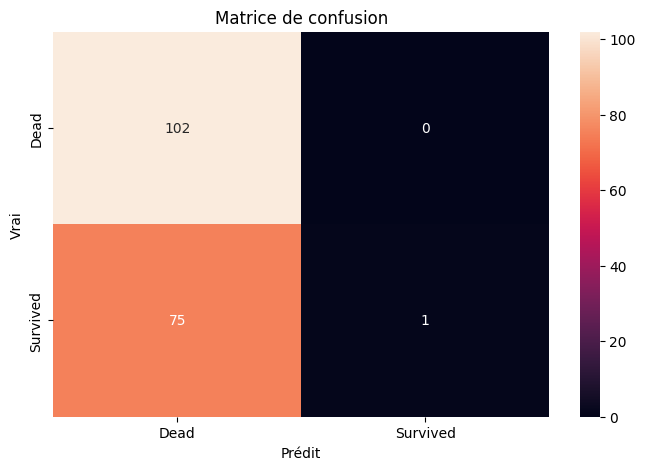

In [65]:

# Création d'un DataFrame pour l'affichage
df_cm = pd.DataFrame(matrice_confusion, index=[
                     'Dead', 'Survived'], columns=['Dead', 'Survived'])
# Création de la heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title('Matrice de confusion')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [85]:
print(f"\ndf.columns:\n{df.columns } \n")
print(f"\ndf.head(1) :\n{df.head(1)} \n")
print(f"\nX_test.head(1) :\n{X_test.head(1)} \n")


df.columns:
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object') 


df.head(1) :
  Survived  Pclass                    Name   Sex   Age  \
0     Dead       3  Mr. Owen Harris Braund  male  22.0   

   Siblings/Spouses Aboard  Parents/Children Aboard  Fare  
0                        1                        0  7.25   


X_test.head(1) :
     Pclass  Age  Siblings/Spouses Aboard  Parents/Children Aboard  Fare
346       3  3.0                        1                        1  15.9 



In [82]:
# calcul des probalités de prediction sur le test set
y_pred_proba = model.predict_proba(X_test)
# print(f"\n y_pred_proba:\n{y_pred_proba} \n")
#  la colonne dead correspond à la colonne 1 de  y_pred_proba
#  la colonne survived correspond à la colonne 2 de  y_pred_proba
survived_proba = y_pred_proba[:, 1]
# print(f"\n survived_proba:\n{survived_proba} \n")
# Création d'un nouveau DataFrame avec les probabilités de survie
df_proba = pd.DataFrame(survived_proba, columns=[
                        'Survived_Proba'])
# print(f"\ndf_proba.columns :\n{df_proba.columns} \n")
# Ajout des informations des passagers
# #jointure du df X_test avec le df_proba
df_proba=df_proba.join(X_test)
# print(f"\ndf_proba :\n{df_proba.head(1)} \n")

# Tri du DataFrame par probabilité de survie
df_proba_sorted = df_proba.sort_values(by='Survived_Proba', ascending=False)

# Affichage du DataFrame trié
print(df_proba_sorted)

     Survived_Proba  Pclass   Age  Siblings/Spouses Aboard  \
34         0.633342     NaN   NaN                      NaN   
123        0.468837     NaN   NaN                      NaN   
73         0.464973     NaN   NaN                      NaN   
67         0.432748     NaN   NaN                      NaN   
130        0.403992     3.0  20.0                      0.0   
..              ...     ...   ...                      ...   
44         0.016148     NaN   NaN                      NaN   
56         0.014719     NaN   NaN                      NaN   
49         0.014014     NaN   NaN                      NaN   
134        0.006099     2.0  23.0                      0.0   
126        0.005277     3.0  24.0                      0.0   

     Parents/Children Aboard     Fare  
34                       NaN      NaN  
123                      NaN      NaN  
73                       NaN      NaN  
67                       NaN      NaN  
130                      0.0   7.0500  
..             

# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

In [ ]:
# It's up to you:

# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?
